In [1]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn import cross_validation
import matplotlib.pyplot as plt

C:\Users\zhuxx\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
def creat_data(n):
    '''
    产生用于回归问题的数据集

    :param n:  数据集容量
    :return: 返回一个元组，元素依次为：训练样本集、测试样本集、训练样本集对应的值、测试样本集对应的值
    '''
    np.random.seed(0)
    X = 5 * np.random.rand(n, 1)
    y = np.sin(X).ravel()
    noise_num=(int)(n/5)
    y[::5] += 3 * (0.5 - np.random.rand(noise_num)) # 每第5个样本，就在该样本的值上添加噪音
    return cross_validation.train_test_split(X, y,
		test_size=0.25,random_state=1) # 拆分原始数据集为训练集和测试集，其中测试集大小为元素数据集大小的 1/4

In [3]:
def test_DecisionTreeRegressor(*data):
    '''
    测试 DecisionTreeRegressor 的用法

    :param data: 可变参数。它是一个元组，这里要求其元素依次为：训练样本集、测试样本集、训练样本的值、测试样本的值
    :return: None
    '''
    X_train,X_test,y_train,y_test=data
    regr = DecisionTreeRegressor()
    regr.fit(X_train, y_train)
    print("Training score:%f"%(regr.score(X_train,y_train)))
    print("Testing score:%f"%(regr.score(X_test,y_test)))
    ##绘图
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    X = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
    Y = regr.predict(X)
    ax.scatter(X_train, y_train, label="train sample",c='g')
    ax.scatter(X_test, y_test, label="test sample",c='r')
    ax.plot(X, Y, label="predict_value", linewidth=2,alpha=0.5)
    ax.set_xlabel("data")
    ax.set_ylabel("target")
    ax.set_title("Decision Tree Regression")
    ax.legend(framealpha=0.5)
    plt.show()

In [4]:
def test_DecisionTreeRegressor_splitter(*data):
    '''
    测试 DecisionTreeRegressor 预测性能随划分类型的影响

    :param data: 可变参数。它是一个元组，这里要求其元素依次为：训练样本集、测试样本集、训练样本的值、测试样本的值
    :return: None
    '''
    X_train,X_test,y_train,y_test=data
    splitters=['best','random']
    for splitter in splitters:
        regr = DecisionTreeRegressor(splitter=splitter)
        regr.fit(X_train, y_train)
        print("Splitter %s"%splitter)
        print("Training score:%f"%(regr.score(X_train,y_train)))
        print("Testing score:%f"%(regr.score(X_test,y_test)))

Training score:1.000000
Testing score:0.789107


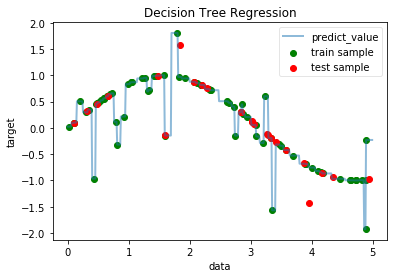

In [5]:
def test_DecisionTreeRegressor_depth(*data,maxdepth):
    '''
    测试 DecisionTreeRegressor 预测性能随  max_depth 的影响

    :param data:  可变参数。它是一个元组，这里要求其元素依次为：训练样本集、测试样本集、训练样本的值、测试样本的值
    :param maxdepth: 一个整数，它作为 DecisionTreeRegressor 的 max_depth 参数
    :return: None
    '''
    X_train,X_test,y_train,y_test=data
    depths=np.arange(1,maxdepth)
    training_scores=[]
    testing_scores=[]
    for depth in depths:
        regr = DecisionTreeRegressor(max_depth=depth)
        regr.fit(X_train, y_train)
        training_scores.append(regr.score(X_train,y_train))
        testing_scores.append(regr.score(X_test,y_test))

    ## 绘图
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    ax.plot(depths,training_scores,label="traing score")
    ax.plot(depths,testing_scores,label="testing score")
    ax.set_xlabel("maxdepth")
    ax.set_ylabel("score")
    ax.set_title("Decision Tree Regression")
    ax.legend(framealpha=0.5)
    plt.show()
if __name__=='__main__':
    X_train,X_test,y_train,y_test=creat_data(100) # 产生用于回归问题的数据集
    test_DecisionTreeRegressor(X_train,X_test,y_train,y_test) # 调用 test_DecisionTreeRegressor
    # test_DecisionTreeRegressor_splitter(X_train,X_test,y_train,y_test) # 调用 test_DecisionTreeRegressor_splitter
    # test_DecisionTreeRegressor_depth(X_train,X_test,y_train,y_test,maxdepth=20) # 调用 test_DecisionTreeRegressor_depth